# Loading in data

In [ ]:

# We will use the following Python libraries:
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import pandas as pd

# theta and variances are stored separately
theta_data=pd.read_csv('https://raw.githubusercontent.com/paulodowd/GeneralPurpose/master/R-T/theta.csv', sep=',')
variance_data=pd.read_csv('https://raw.githubusercontent.com/paulodowd/GeneralPurpose/master/R-T/variances.csv', sep=',')

print(theta_data)
print(variance_data)


                 Scenario  Trial  Time  Theta
0          analogue_curve      1     1  -6.69
1          analogue_curve      1     2  -6.69
2          analogue_curve      1     3  -6.80
3          analogue_curve      1     4  -6.69
4          analogue_curve      1     5  -6.80
...                   ...    ...   ...    ...
51446  switching_straight      7   296 -11.60
51447  switching_straight      7   297 -11.60
51448  switching_straight      7   298 -11.60
51449  switching_straight      7   299 -11.60
51450  switching_straight      7   300 -11.60

[51451 rows x 4 columns]
                Scenario  Trial  Time       DN1       DN2       DN3       DN4  \
0           analog_curve      1     1  0.000020  0.000009  0.000000  0.000003   
1           analog_curve      1     2  0.000195  0.002067  0.000057  0.002776   
2           analog_curve      1     3  0.000164  0.001161  0.000084  0.000546   
3           analog_curve      1     4  0.000203  0.000186  0.000062  0.000188   
4           analo

# Looking at how theta over time for each scenario.

It looks like some of your data is a bit incomplete (stopping short on time).  We'll chop off the extra data in the next plot.

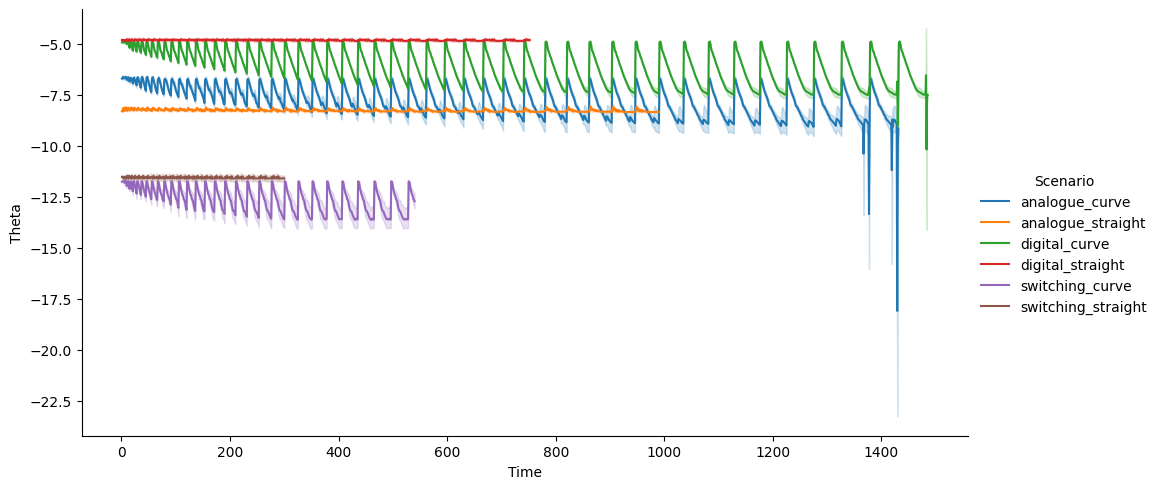

In [ ]:

colours = dict(zip(theta_data['Scenario'].unique(), sns.color_palette(n_colors=len(theta_data['Scenario'].unique()))))

lplot = sns.relplot(data=theta_data, x='Time', y='Theta', kind='line', hue='Scenario', palette=colours,  height=5, aspect=2, errorbar=('ci',95) )

# Looking at Theta over Time for all scenarios, where time is < 300

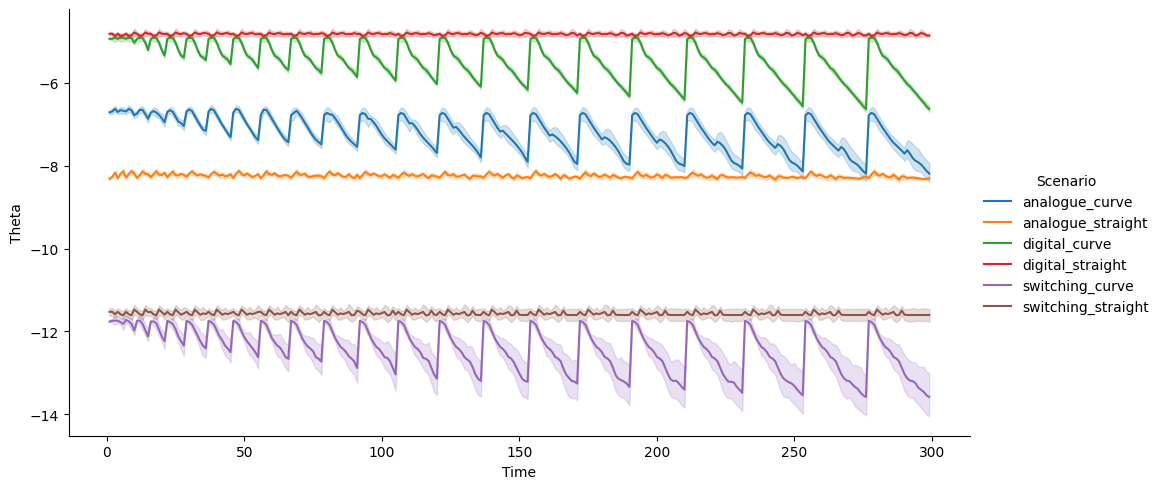

In [ ]:
# let's select for a particular time range.
subset = theta_data[( theta_data['Time'] < 300 ) ]

colours = dict(zip(subset['Scenario'].unique(), sns.color_palette(n_colors=len(subset['Scenario'].unique()))))

lplot = sns.relplot(data=subset, x='Time', y='Theta', kind='line', hue='Scenario', palette=colours,  height=5, aspect=2, errorbar=('ci',95) )

# Quick boxplot of distribution of theta values per scenario

<ipython-input-74-8a95f2644b01>:7: UserWarning: FixedFormatter should only be used together with FixedLocator
  bplot.set_xticklabels(bplot.get_xticklabels(),rotation=30)


[Text(0, 0, 'analogue_curve'),
 Text(1, 0, 'analogue_straight'),
 Text(2, 0, 'digital_curve'),
 Text(3, 0, 'digital_straight'),
 Text(4, 0, 'switching_curve'),
 Text(5, 0, 'switching_straight')]

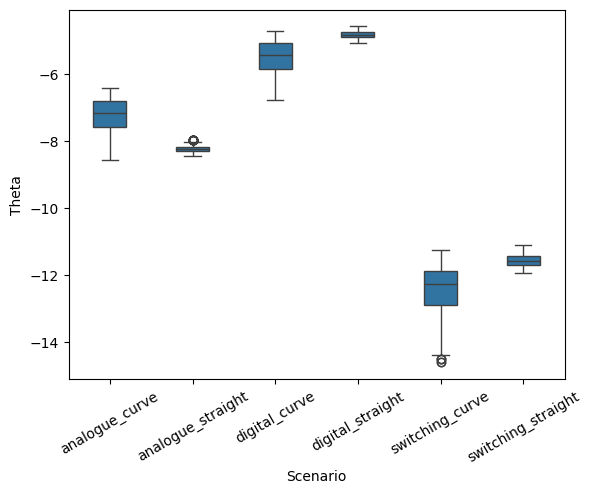

In [ ]:

# shall we select for time<300?

subset = theta_data[( theta_data['Time'] < 300 ) ]

bplot = sns.boxplot(y='Theta', x='Scenario', data=subset, width=0.4)

bplot.set_xticklabels(bplot.get_xticklabels(),rotation=30)

# Taking the difference between sequential theta values to look at how stable line following was.

Because we take the change in theta, that negates any initial offset value.
Looks good.  We'd expect a striaght line to be centered on 0.
Whilst a curve will have an offset because the robot is slowly increasing it's relative rotation (pose).

<ipython-input-75-bc01178230fc>:13: UserWarning: FixedFormatter should only be used together with FixedLocator
  bplot.set_xticklabels(bplot.get_xticklabels(),rotation=30)


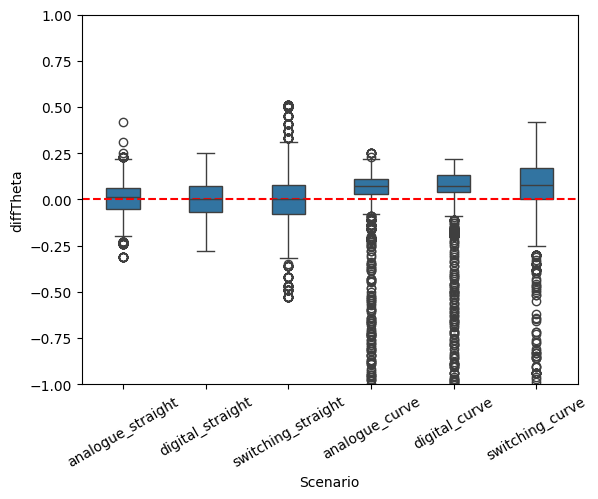

In [ ]:

# Add a new column to the dataframe that contains
# the diffrence between theta in one row and the previous row
theta_data['diffTheta'] = theta_data['Theta'] - theta_data['Theta'].shift(-1)

# Let's select a smaller range of your data
subset = theta_data[ (theta_data['Time'] < 300 )]

# control which order they are plotted in
scenario_order = ['analogue_straight', 'digital_straight', 'switching_straight', 'analogue_curve', 'digital_curve', 'switching_curve']

bplot = sns.boxplot(y='diffTheta', x='Scenario', data=subset, order=scenario_order, width=0.4)

bplot.set_xticklabels(bplot.get_xticklabels(),rotation=30)
bplot.set(ylim=(-1, 1))
bplot.axhline(0, c='r', linestyle='--')

# Let's plot change in theta (diffTheta) over time to see what that looks like

Something a bit odd going on with **switching_curve**, you might want to inspect the raw data (look at the csv).

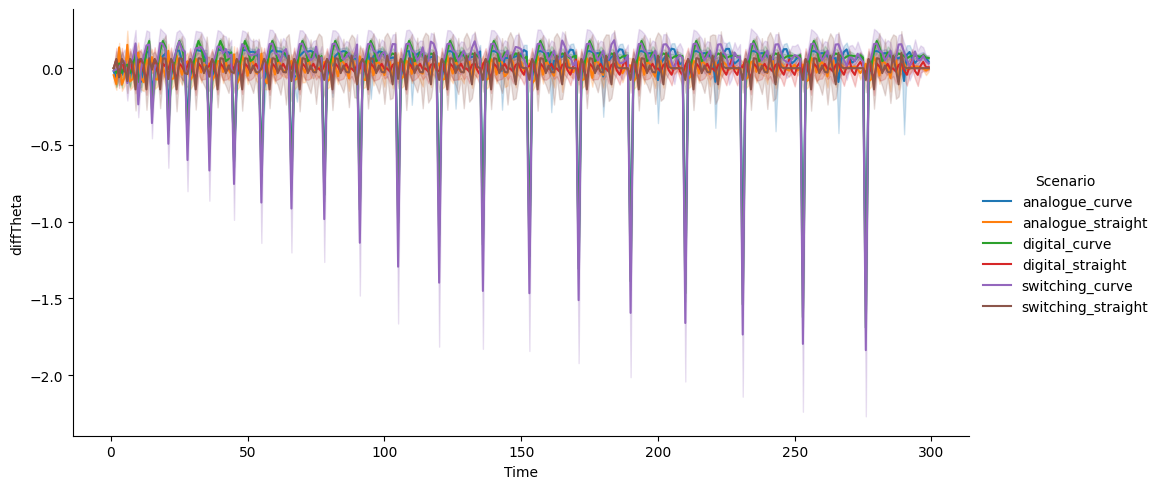

In [ ]:
# Add a new column to the dataframe that contains
# the diffrence between theta in one row and the previous row
theta_data['diffTheta'] = theta_data['Theta'] - theta_data['Theta'].shift(-1)

# Let's select a smaller range of your data
subset = theta_data[ (theta_data['Time'] < 300 )]

colours = dict(zip(subset['Scenario'].unique(), sns.color_palette(n_colors=len(subset['Scenario'].unique()))))

lplot = sns.relplot(data=subset, x='Time', y='diffTheta', kind='line', hue='Scenario', palette=colours,  height=5, aspect=2, errorbar=('ci',95) )

# Lets find the problem with switching_curve by plotting each trial

Maybe it isn't an error?  Perhaps the robot was doing a periodic rapid course correction whilst following a curve?  Seems unlikely that they would all line up at the same point in time?

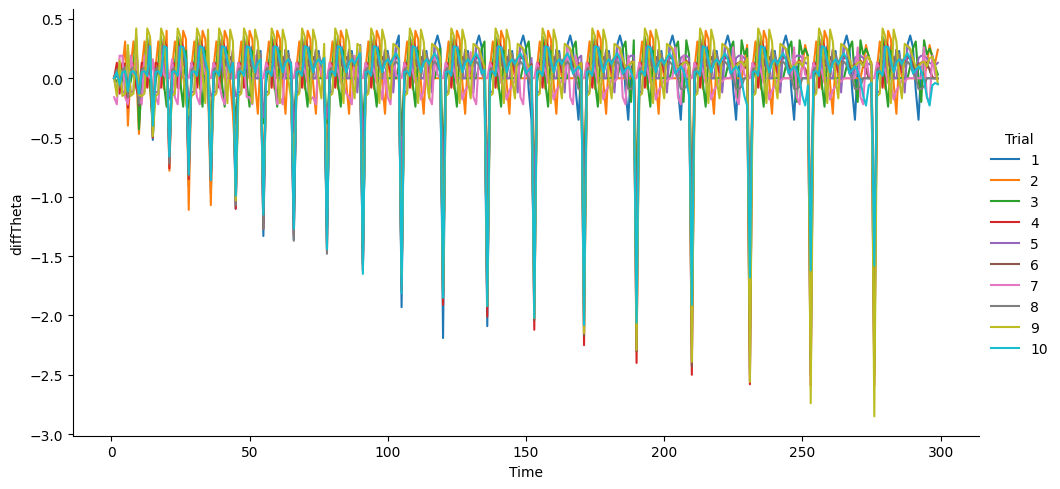

In [ ]:
# Add a new column to the dataframe that contains
# the diffrence between theta in one row and the previous row
theta_data['diffTheta'] = theta_data['Theta'] - theta_data['Theta'].shift(-1)

# Let's select a smaller range of your data
subset = theta_data[ (theta_data['Time'] < 300 )]
subset = subset[ (subset['Scenario'] == 'switching_curve')]

colours = dict(zip(subset['Trial'].unique(), sns.color_palette(n_colors=len(subset['Trial'].unique()))))

lplot = sns.relplot(data=subset, x='Time', y='diffTheta', kind='line', hue='Trial', palette=colours,  height=5, aspect=2, errorbar=('ci',95) )

# How mean variance compares between all scenarios.

Using a mean variance across all sensors. It looks like analog_curve is particularly bad.  You might want to think about whether you need to use two plots, either with different y-axis scales, or one excluding analogue_curve.

<ipython-input-83-0c33313c607d>:13: UserWarning: FixedFormatter should only be used together with FixedLocator
  bplot.set_xticklabels(bplot.get_xticklabels(),rotation=30)


[(-0.0, 0.02)]

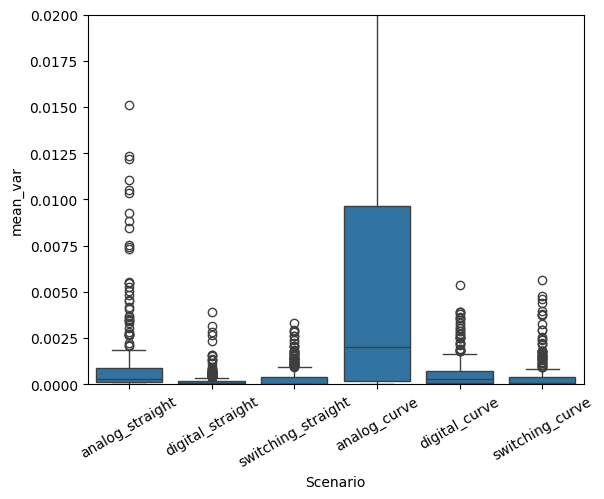

In [ ]:

# let's get a mean variance across all sensors and put
# it in a new column
variance_data['mean_var'] = variance_data[['DN1', 'DN2', 'DN3', 'DN4', 'DN5']].mean(axis=1)

subset = variance_data[(variance_data['Time'] < 30)]

# control which order they are plotted in
scenario_order = ['analog_straight', 'digital_straight', 'switching_straight', 'analog_curve', 'digital_curve', 'switching_curve']

bplot = sns.boxplot(y='mean_var', x='Scenario', data=subset, order=scenario_order,width=0.8)


bplot.set_xticklabels(bplot.get_xticklabels(),rotation=30)
bplot.set(ylim=(-0.0, 0.02))


# How mean variance compares, excluding analog_curve


<ipython-input-82-e1204eb4c9dc>:15: UserWarning: FixedFormatter should only be used together with FixedLocator
  bplot.set_xticklabels(bplot.get_xticklabels(),rotation=30)


[(-0.0, 0.0025)]

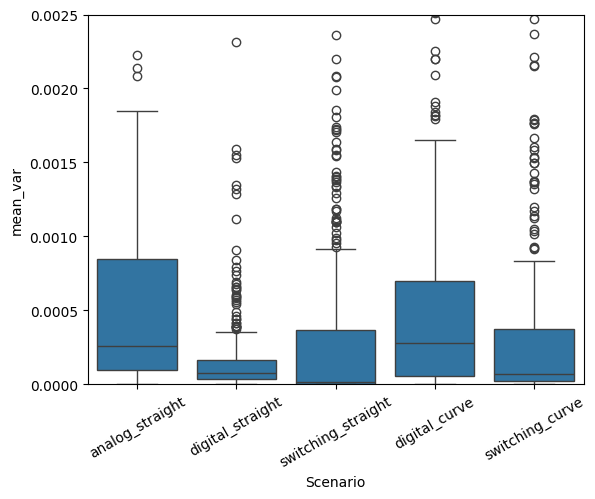

In [ ]:
# let's get a mean variance across all sensors and put
# it in a new column
variance_data['mean_var'] = variance_data[['DN1', 'DN2', 'DN3', 'DN4', 'DN5']].mean(axis=1)

subset = variance_data[( variance_data['Scenario'] != 'analog_curve')]

subset = subset[(subset['Time'] < 30)]

# control which order they are plotted in
scenario_order = ['analog_straight', 'digital_straight', 'switching_straight','digital_curve', 'switching_curve']

bplot = sns.boxplot(y='mean_var', x='Scenario', data=subset, order=scenario_order,width=0.8)


bplot.set_xticklabels(bplot.get_xticklabels(),rotation=30)
bplot.set(ylim=(-0.0, 0.0025))

# Variance looking at each sensor, just for curves.



      sensor            Scenario  Trial  Time       Var      mean_var
0        DN1        analog_curve      1     1  0.000020  7.400000e-06
1        DN1        analog_curve      1     2  0.000195  1.047000e-03
2        DN1        analog_curve      1     3  0.000164  4.202000e-04
3        DN1        analog_curve      1     4  0.000203  1.960000e-04
4        DN1        analog_curve      1     5  0.000209  3.296000e-04
...      ...                 ...    ...   ...       ...           ...
13630    DN5  switching_straight     10    23  0.000000  2.000000e-07
13631    DN5  switching_straight     10    24  0.000000  0.000000e+00
13632    DN5  switching_straight     10    25  0.000000  2.000000e-07
13633    DN5  switching_straight     10    26  0.000000  8.000000e-07
13634    DN5  switching_straight     10    27  0.000000  1.200000e-06

[13635 rows x 6 columns]


<ipython-input-63-34643cdbff72>:41: UserWarning: FixedFormatter should only be used together with FixedLocator
  bplot.set_xticklabels(bplot.get_xticklabels(),rotation=30)


[(-0.0, 0.0125)]

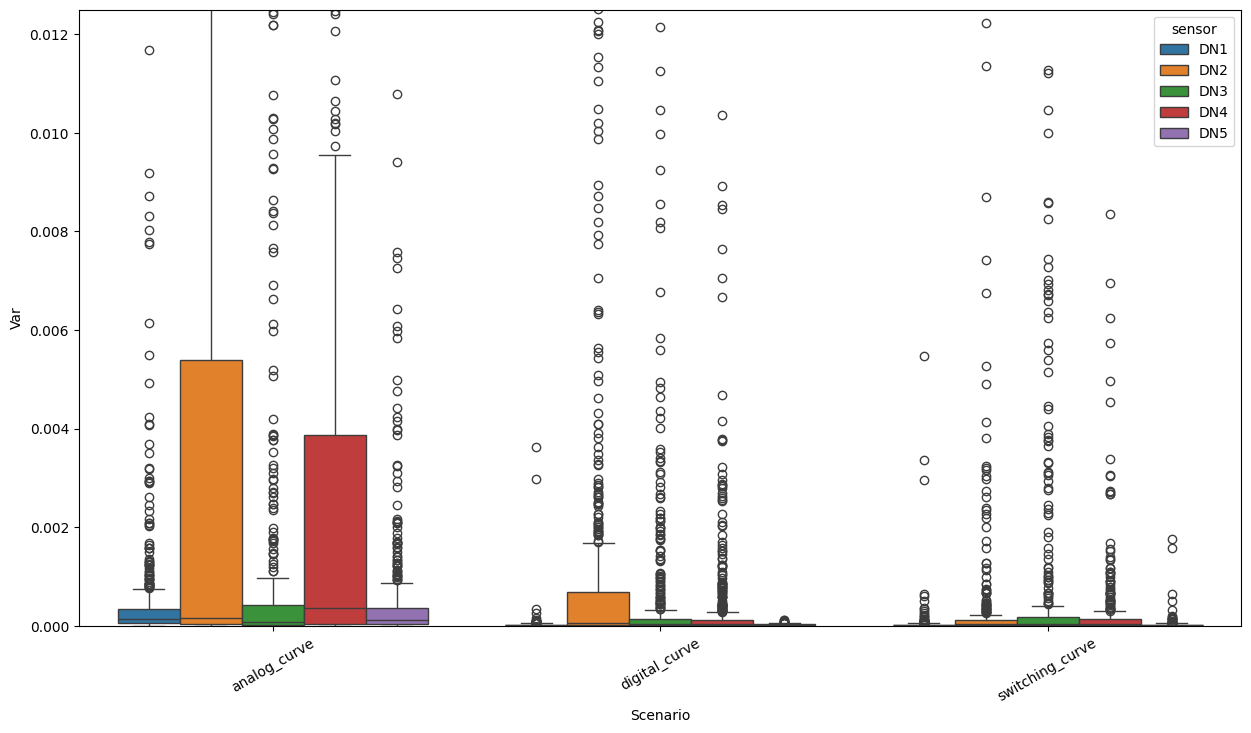

In [ ]:
# I goofed up on the data formatting a little, so
# re-arranging the dataframe to do this...

#print( variance_data)

sensor = ['DN1', 'DN2', 'DN3', 'DN4', 'DN5']

# slice into separate dataframes, omitting data from other sensors
dn1 = variance_data.drop(['DN2', 'DN3', 'DN4', 'DN5'], axis=1)
dn2 = variance_data.drop(['DN1', 'DN3', 'DN4', 'DN5'], axis=1)
dn3 = variance_data.drop(['DN1', 'DN2', 'DN4', 'DN5'], axis=1)
dn4 = variance_data.drop(['DN1', 'DN2', 'DN3', 'DN5'], axis=1)
dn5 = variance_data.drop(['DN1', 'DN2', 'DN3', 'DN4'], axis=1)

# Relabel each dataframe
dn1.insert(0, 'sensor', sensor[0])
dn1.columns = ['sensor', 'Scenario', 'Trial', 'Time', 'Var', 'mean_var']

dn2.insert(0, 'sensor', sensor[1])
dn2.columns = ['sensor', 'Scenario', 'Trial', 'Time', 'Var', 'mean_var']

dn3.insert(0, 'sensor', sensor[2])
dn3.columns = ['sensor', 'Scenario', 'Trial', 'Time', 'Var', 'mean_var']

dn4.insert(0, 'sensor', sensor[3])
dn4.columns = ['sensor', 'Scenario', 'Trial', 'Time', 'Var', 'mean_var']

dn5.insert(0, 'sensor', sensor[4])
dn5.columns = ['sensor', 'Scenario', 'Trial', 'Time', 'Var', 'mean_var']

# concatenate frames into a long list
frames = [ dn1, dn2, dn3, dn4, dn5]
new_df = pd.concat( frames, ignore_index=True)
new_df.reset_index()

print( new_df )

# select only curve data
subset = new_df[( new_df['Scenario'] == 'analog_curve') | (new_df['Scenario'] == 'digital_curve') | (new_df['Scenario'] == 'switching_curve' )]
plt.figure(figsize=(15,8))
bplot = sns.boxplot(y='Var', x='Scenario', hue='sensor', data=subset)
bplot.set_xticklabels(bplot.get_xticklabels(),rotation=30)
bplot.set(ylim=(-0.0, 0.0125))


# Variance for each sensor, just looking at straight lines.
Looks like switching has an effect, reducing the variance for each sensor!


      sensor            Scenario  Trial  Time       Var      mean_var
0        DN1        analog_curve      1     1  0.000020  7.400000e-06
1        DN1        analog_curve      1     2  0.000195  1.047000e-03
2        DN1        analog_curve      1     3  0.000164  4.202000e-04
3        DN1        analog_curve      1     4  0.000203  1.960000e-04
4        DN1        analog_curve      1     5  0.000209  3.296000e-04
...      ...                 ...    ...   ...       ...           ...
13630    DN5  switching_straight     10    23  0.000000  2.000000e-07
13631    DN5  switching_straight     10    24  0.000000  0.000000e+00
13632    DN5  switching_straight     10    25  0.000000  2.000000e-07
13633    DN5  switching_straight     10    26  0.000000  8.000000e-07
13634    DN5  switching_straight     10    27  0.000000  1.200000e-06

[13635 rows x 6 columns]


<ipython-input-76-090d8ad34bd2>:42: UserWarning: FixedFormatter should only be used together with FixedLocator
  bplot.set_xticklabels(bplot.get_xticklabels(),rotation=30)


[(-0.0, 0.00125)]

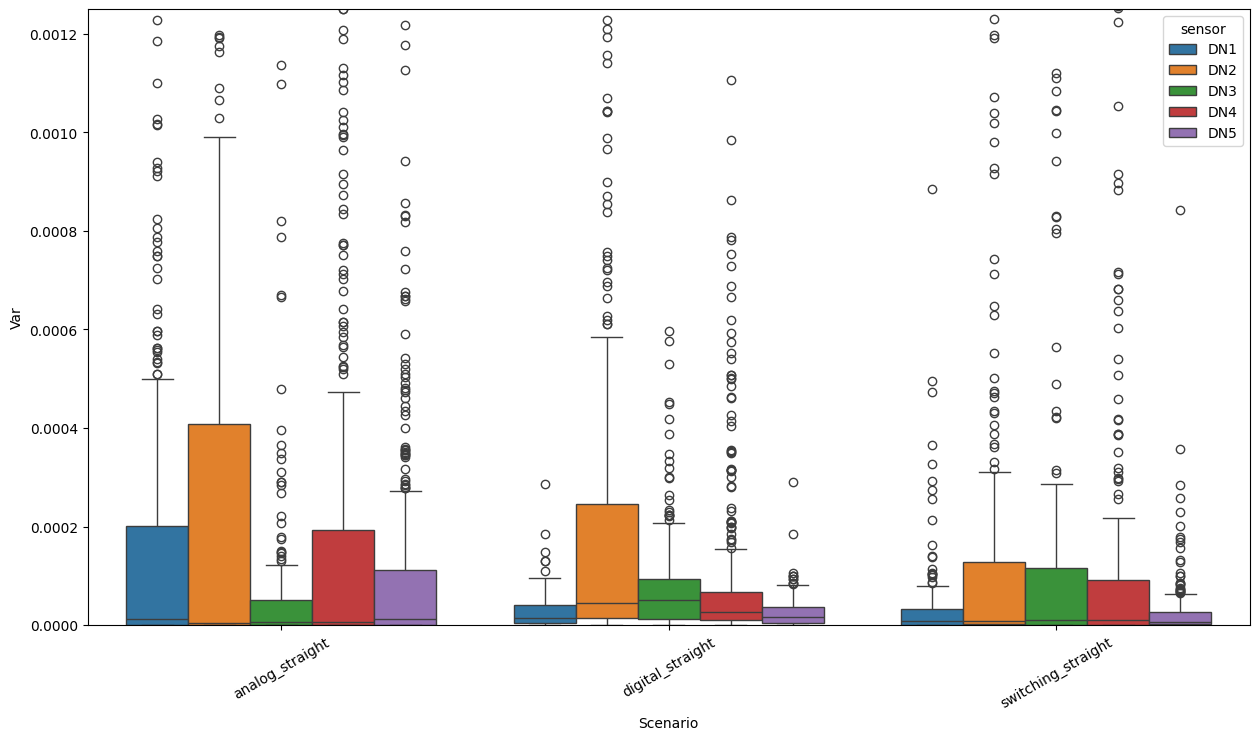

In [ ]:
# I goofed up on the data formatting a little, so
# re-arranging the dataframe to do this...

#print( variance_data)

sensor = ['DN1', 'DN2', 'DN3', 'DN4', 'DN5']

# slice into separate dataframes, omitting data from other sensors
dn1 = variance_data.drop(['DN2', 'DN3', 'DN4', 'DN5'], axis=1)
dn2 = variance_data.drop(['DN1', 'DN3', 'DN4', 'DN5'], axis=1)
dn3 = variance_data.drop(['DN1', 'DN2', 'DN4', 'DN5'], axis=1)
dn4 = variance_data.drop(['DN1', 'DN2', 'DN3', 'DN5'], axis=1)
dn5 = variance_data.drop(['DN1', 'DN2', 'DN3', 'DN4'], axis=1)

# Relabel each dataframe
dn1.insert(0, 'sensor', sensor[0])
dn1.columns = ['sensor', 'Scenario', 'Trial', 'Time', 'Var', 'mean_var']

dn2.insert(0, 'sensor', sensor[1])
dn2.columns = ['sensor', 'Scenario', 'Trial', 'Time', 'Var', 'mean_var']

dn3.insert(0, 'sensor', sensor[2])
dn3.columns = ['sensor', 'Scenario', 'Trial', 'Time', 'Var', 'mean_var']

dn4.insert(0, 'sensor', sensor[3])
dn4.columns = ['sensor', 'Scenario', 'Trial', 'Time', 'Var', 'mean_var']

dn5.insert(0, 'sensor', sensor[4])
dn5.columns = ['sensor', 'Scenario', 'Trial', 'Time', 'Var', 'mean_var']

# concatenate frames into a long list
frames = [ dn1, dn2, dn3, dn4, dn5]
new_df = pd.concat( frames, ignore_index=True)
new_df.reset_index()

print( new_df )

# select only curve data
subset = new_df[( new_df['Scenario'] == 'analog_straight') | (new_df['Scenario'] == 'digital_straight') | (new_df['Scenario'] == 'switching_straight' )]
plt.figure(figsize=(15,8))
bplot = sns.boxplot(y='Var', x='Scenario', hue='sensor', data=subset)
bplot.set_xticklabels(bplot.get_xticklabels(),rotation=30)
bplot.set(ylim=(-0.0, 0.00125))


# How does variance change over time for each scenario?




      sensor            Scenario  Trial  Time       Var      mean_var
0        DN1        analog_curve      1     1  0.000020  7.400000e-06
1        DN1        analog_curve      1     2  0.000195  1.047000e-03
2        DN1        analog_curve      1     3  0.000164  4.202000e-04
3        DN1        analog_curve      1     4  0.000203  1.960000e-04
4        DN1        analog_curve      1     5  0.000209  3.296000e-04
...      ...                 ...    ...   ...       ...           ...
13630    DN5  switching_straight     10    23  0.000000  2.000000e-07
13631    DN5  switching_straight     10    24  0.000000  0.000000e+00
13632    DN5  switching_straight     10    25  0.000000  2.000000e-07
13633    DN5  switching_straight     10    26  0.000000  8.000000e-07
13634    DN5  switching_straight     10    27  0.000000  1.200000e-06

[13635 rows x 6 columns]


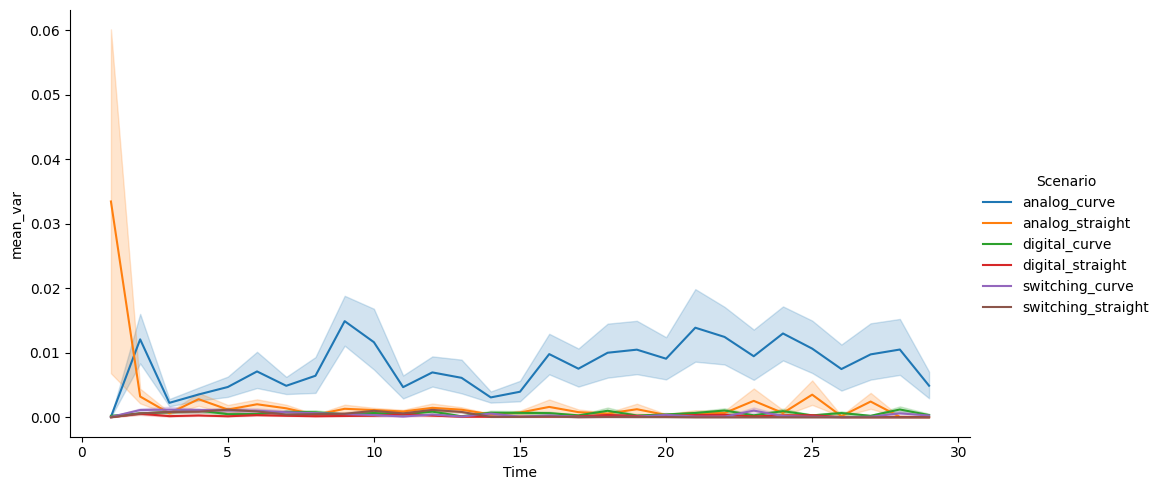

In [ ]:
# I goofed up on the data formatting a little, so
# re-arranging the dataframe to do this...

#print( variance_data)

sensor = ['DN1', 'DN2', 'DN3', 'DN4', 'DN5']

# slice into separate dataframes, omitting data from other sensors
dn1 = variance_data.drop(['DN2', 'DN3', 'DN4', 'DN5'], axis=1)
dn2 = variance_data.drop(['DN1', 'DN3', 'DN4', 'DN5'], axis=1)
dn3 = variance_data.drop(['DN1', 'DN2', 'DN4', 'DN5'], axis=1)
dn4 = variance_data.drop(['DN1', 'DN2', 'DN3', 'DN5'], axis=1)
dn5 = variance_data.drop(['DN1', 'DN2', 'DN3', 'DN4'], axis=1)

# Relabel each dataframe
dn1.insert(0, 'sensor', sensor[0])
dn1.columns = ['sensor', 'Scenario', 'Trial', 'Time', 'Var', 'mean_var']

dn2.insert(0, 'sensor', sensor[1])
dn2.columns = ['sensor', 'Scenario', 'Trial', 'Time', 'Var', 'mean_var']

dn3.insert(0, 'sensor', sensor[2])
dn3.columns = ['sensor', 'Scenario', 'Trial', 'Time', 'Var', 'mean_var']

dn4.insert(0, 'sensor', sensor[3])
dn4.columns = ['sensor', 'Scenario', 'Trial', 'Time', 'Var', 'mean_var']

dn5.insert(0, 'sensor', sensor[4])
dn5.columns = ['sensor', 'Scenario', 'Trial', 'Time', 'Var', 'mean_var']

# concatenate frames into a long list
frames = [ dn1, dn2, dn3, dn4, dn5]
new_df = pd.concat( frames, ignore_index=True)
new_df.reset_index()

print( new_df )

# shall we cut time to 30?
new_df = new_df[ (new_df['Time'] < 30)]

colours = dict(zip(new_df['Scenario'].unique(), sns.color_palette(n_colors=len(new_df['Scenario'].unique()))))

lplot = sns.relplot(data=new_df, x='Time', y='mean_var', kind='line', hue='Scenario', palette=colours, height=5, aspect=2, errorbar=('ci',95) )


# What about per sensor, just for one scenario? (analog_curve)

Looks like DN 2 and 4 get the most variance (changes in activation?)

      sensor            Scenario  Trial  Time       Var      mean_var
0        DN1        analog_curve      1     1  0.000020  7.400000e-06
1        DN1        analog_curve      1     2  0.000195  1.047000e-03
2        DN1        analog_curve      1     3  0.000164  4.202000e-04
3        DN1        analog_curve      1     4  0.000203  1.960000e-04
4        DN1        analog_curve      1     5  0.000209  3.296000e-04
...      ...                 ...    ...   ...       ...           ...
13630    DN5  switching_straight     10    23  0.000000  2.000000e-07
13631    DN5  switching_straight     10    24  0.000000  0.000000e+00
13632    DN5  switching_straight     10    25  0.000000  2.000000e-07
13633    DN5  switching_straight     10    26  0.000000  8.000000e-07
13634    DN5  switching_straight     10    27  0.000000  1.200000e-06

[13635 rows x 6 columns]


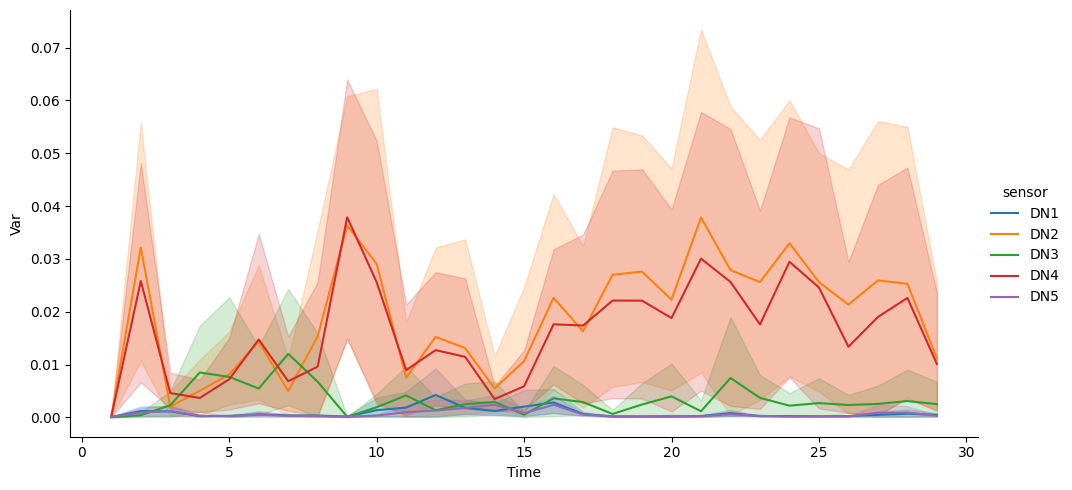

In [ ]:
# I goofed up on the data formatting a little, so
# re-arranging the dataframe to do this...

#print( variance_data)

sensor = ['DN1', 'DN2', 'DN3', 'DN4', 'DN5']

# slice into separate dataframes, omitting data from other sensors
dn1 = variance_data.drop(['DN2', 'DN3', 'DN4', 'DN5'], axis=1)
dn2 = variance_data.drop(['DN1', 'DN3', 'DN4', 'DN5'], axis=1)
dn3 = variance_data.drop(['DN1', 'DN2', 'DN4', 'DN5'], axis=1)
dn4 = variance_data.drop(['DN1', 'DN2', 'DN3', 'DN5'], axis=1)
dn5 = variance_data.drop(['DN1', 'DN2', 'DN3', 'DN4'], axis=1)

# Relabel each dataframe
dn1.insert(0, 'sensor', sensor[0])
dn1.columns = ['sensor', 'Scenario', 'Trial', 'Time', 'Var', 'mean_var']

dn2.insert(0, 'sensor', sensor[1])
dn2.columns = ['sensor', 'Scenario', 'Trial', 'Time', 'Var', 'mean_var']

dn3.insert(0, 'sensor', sensor[2])
dn3.columns = ['sensor', 'Scenario', 'Trial', 'Time', 'Var', 'mean_var']

dn4.insert(0, 'sensor', sensor[3])
dn4.columns = ['sensor', 'Scenario', 'Trial', 'Time', 'Var', 'mean_var']

dn5.insert(0, 'sensor', sensor[4])
dn5.columns = ['sensor', 'Scenario', 'Trial', 'Time', 'Var', 'mean_var']

# concatenate frames into a long list
frames = [ dn1, dn2, dn3, dn4, dn5]
new_df = pd.concat( frames, ignore_index=True)
new_df.reset_index()

print( new_df )

# shall we cut time to 30?
new_df = new_df[ (new_df['Time'] < 30)]

subset = new_df[(new_df['Scenario'] == 'analog_curve')]

colours = dict(zip(subset['sensor'].unique(), sns.color_palette(n_colors=len(subset['sensor'].unique()))))

lplot = sns.relplot(data=subset, x='Time', y='Var', kind='line', hue='sensor', palette=colours, height=5, aspect=2, errorbar=('ci',95) )


# What about variance per sensor for the improved system (switching_curve)?

      sensor            Scenario  Trial  Time       Var      mean_var
0        DN1        analog_curve      1     1  0.000020  7.400000e-06
1        DN1        analog_curve      1     2  0.000195  1.047000e-03
2        DN1        analog_curve      1     3  0.000164  4.202000e-04
3        DN1        analog_curve      1     4  0.000203  1.960000e-04
4        DN1        analog_curve      1     5  0.000209  3.296000e-04
...      ...                 ...    ...   ...       ...           ...
13630    DN5  switching_straight     10    23  0.000000  2.000000e-07
13631    DN5  switching_straight     10    24  0.000000  0.000000e+00
13632    DN5  switching_straight     10    25  0.000000  2.000000e-07
13633    DN5  switching_straight     10    26  0.000000  8.000000e-07
13634    DN5  switching_straight     10    27  0.000000  1.200000e-06

[13635 rows x 6 columns]


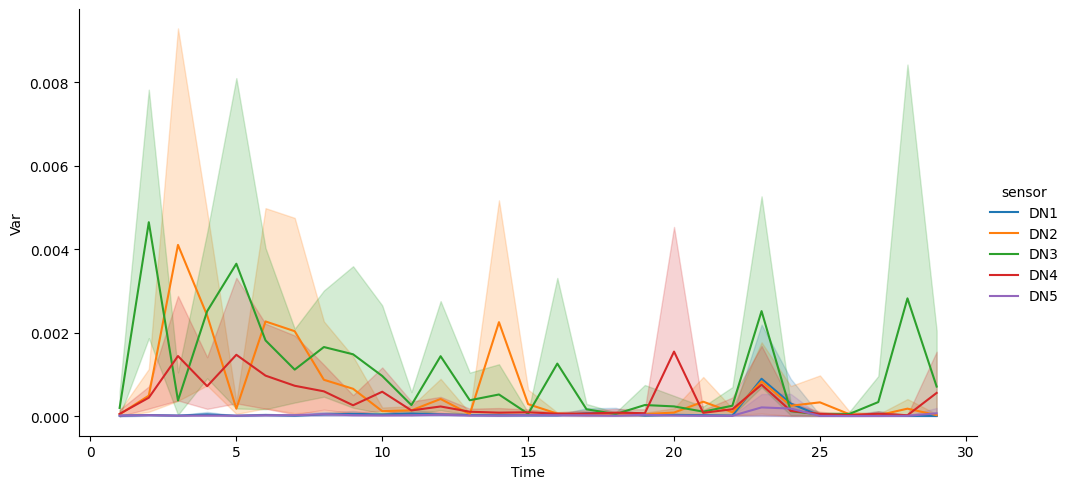

In [ ]:
# I goofed up on the data formatting a little, so
# re-arranging the dataframe to do this...

#print( variance_data)

sensor = ['DN1', 'DN2', 'DN3', 'DN4', 'DN5']

# slice into separate dataframes, omitting data from other sensors
dn1 = variance_data.drop(['DN2', 'DN3', 'DN4', 'DN5'], axis=1)
dn2 = variance_data.drop(['DN1', 'DN3', 'DN4', 'DN5'], axis=1)
dn3 = variance_data.drop(['DN1', 'DN2', 'DN4', 'DN5'], axis=1)
dn4 = variance_data.drop(['DN1', 'DN2', 'DN3', 'DN5'], axis=1)
dn5 = variance_data.drop(['DN1', 'DN2', 'DN3', 'DN4'], axis=1)

# Relabel each dataframe
dn1.insert(0, 'sensor', sensor[0])
dn1.columns = ['sensor', 'Scenario', 'Trial', 'Time', 'Var', 'mean_var']

dn2.insert(0, 'sensor', sensor[1])
dn2.columns = ['sensor', 'Scenario', 'Trial', 'Time', 'Var', 'mean_var']

dn3.insert(0, 'sensor', sensor[2])
dn3.columns = ['sensor', 'Scenario', 'Trial', 'Time', 'Var', 'mean_var']

dn4.insert(0, 'sensor', sensor[3])
dn4.columns = ['sensor', 'Scenario', 'Trial', 'Time', 'Var', 'mean_var']

dn5.insert(0, 'sensor', sensor[4])
dn5.columns = ['sensor', 'Scenario', 'Trial', 'Time', 'Var', 'mean_var']

# concatenate frames into a long list
frames = [ dn1, dn2, dn3, dn4, dn5]
new_df = pd.concat( frames, ignore_index=True)
new_df.reset_index()

print( new_df )

# shall we cut time to 30?
new_df = new_df[ (new_df['Time'] < 30)]

subset = new_df[(new_df['Scenario'] == 'switching_curve')]

colours = dict(zip(subset['sensor'].unique(), sns.color_palette(n_colors=len(subset['sensor'].unique()))))

lplot = sns.relplot(data=subset, x='Time', y='Var', kind='line', hue='sensor', palette=colours, height=5, aspect=2, errorbar=('ci',95) )